# Účast poslanců na jednání PSP

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import datetime

In [2]:
data = pd.read_csv('psp_data.csv', header = None, names = [ "name", "vote", "sess_id", "vot_id", "year", "month" , "day", "hour", "minute" ])

## Procentuální přítomnost poslanců na hlasováních

V první části bych se rád podíval na to, kolika procent hlasování se ten který poslanec v rámci svého současného mandátu zúčastnil.

In [3]:
pmem = data[ 'name' ].sort_values().drop_duplicates()
matt = { key : { "A" : 0, "N" : 0, "M" : 0, "0" : 0, "Z" : 0 } for key in pmem }
df = pd.DataFrame( columns = [ "name", "att", "count", "perc", "ratio" ] )

for mem in pmem:
    matt[ mem ].update( data[ data[ 'name' ] == mem ][ "vote" ].value_counts().to_dict() )
    p_cnt = matt[ mem ][ "A" ] + matt[ mem ][ "N" ] + matt[ mem ][ "Z" ]
    a_cnt = matt[ mem ][ "M" ] + matt[ mem ][ "0" ]
    cnt = p_cnt + a_cnt;
    
    p_rat = str(matt[ mem ][ "A" ]) + "/" + str(matt[ mem ][ "N" ]) + "/" + str(matt[ mem ][ "Z" ])
    a_rat = str(matt[ mem ][ "M" ]) + "/" + str(matt[ mem ][ "0" ])
    
    df = df.append( { "name" : mem, "att" : "present", "count" : p_cnt, "perc" : ( p_cnt / cnt ) * 100, "ratio" : p_rat }, ignore_index=True )
    df = df.append( { "name" : mem, "att" : "absent", "count" : a_cnt, "perc" : (a_cnt / cnt) * 100, "ratio" : a_rat }, ignore_index=True );

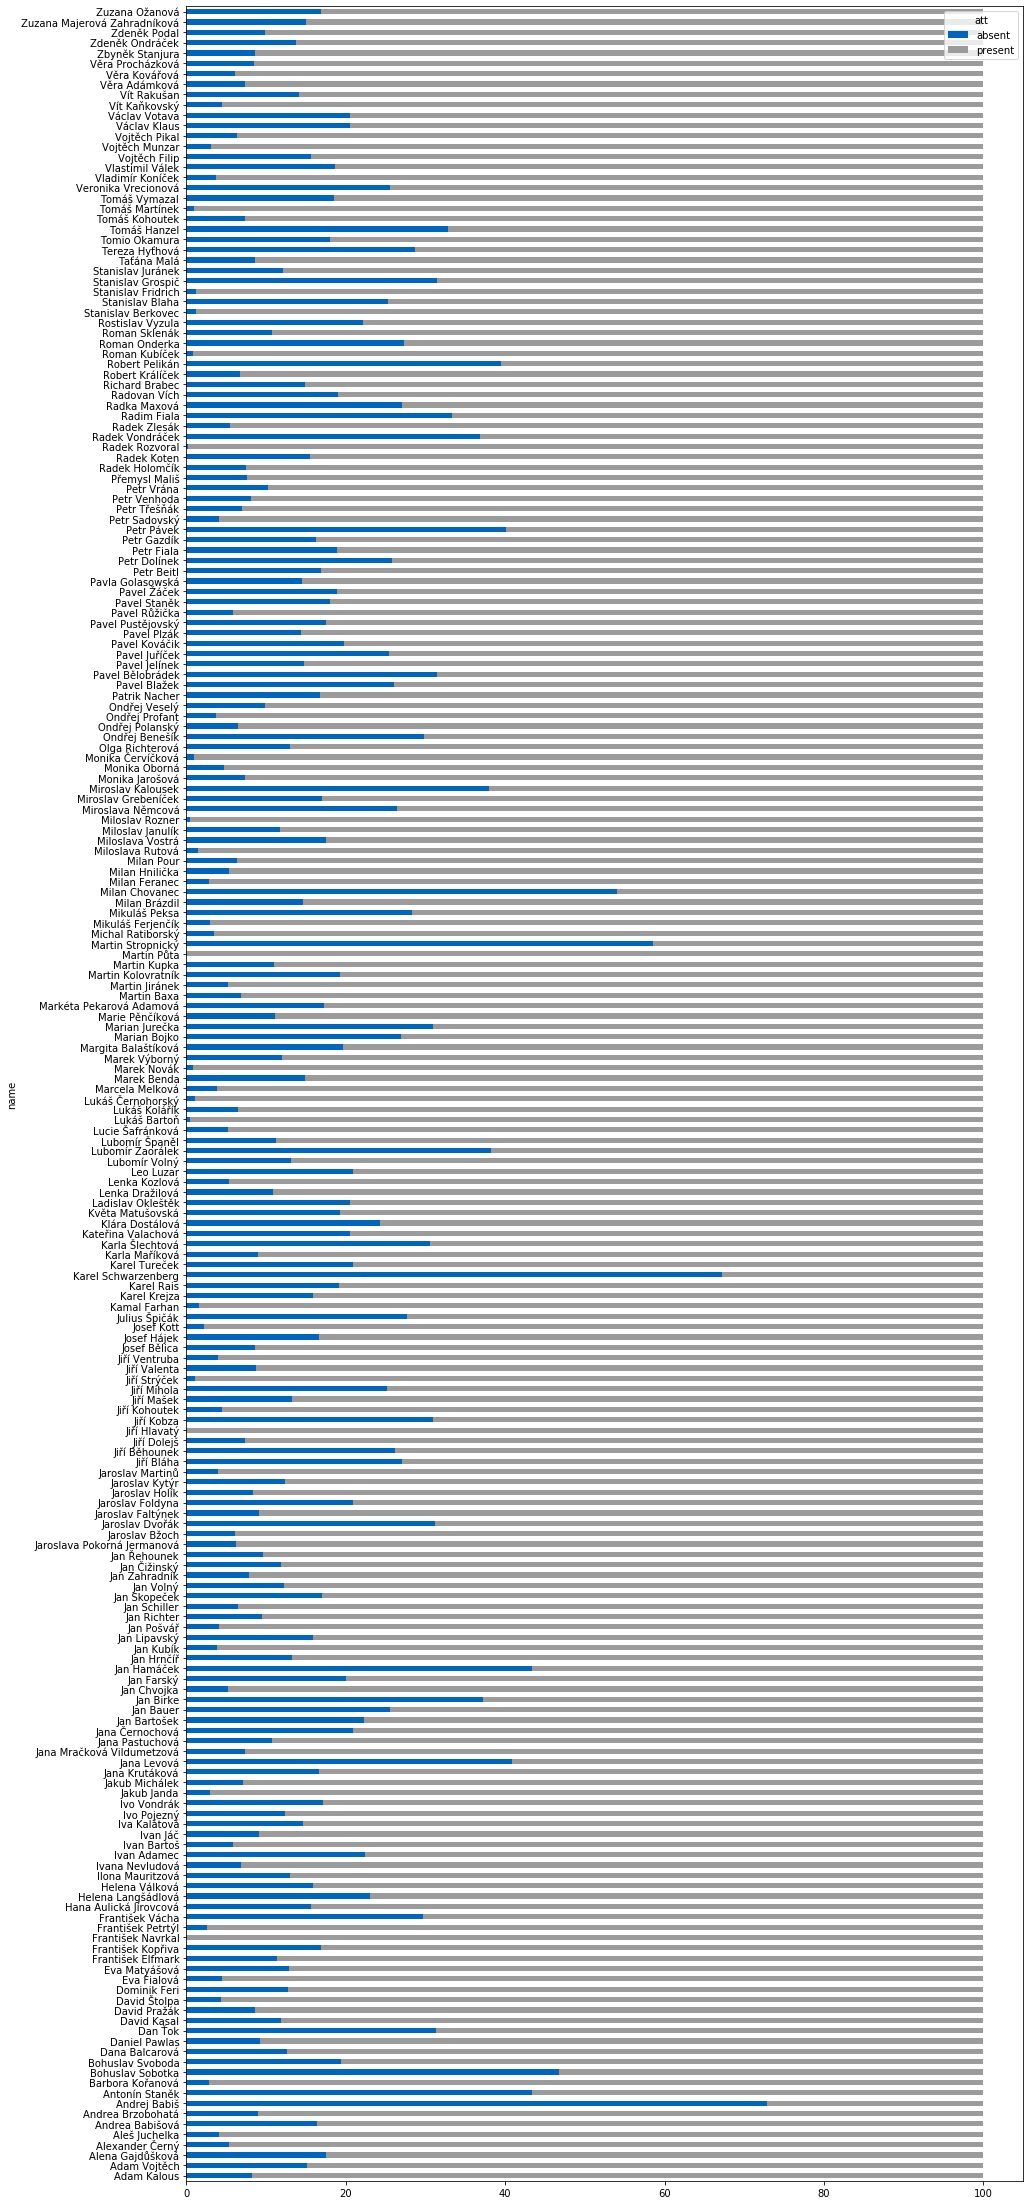

In [4]:
df.pivot( index="name", columns="att", values="perc" ).plot.barh(stacked=True, color={ "#0065bd", "#9b9b9b" }, figsize=(15,40))

84.68433752230433


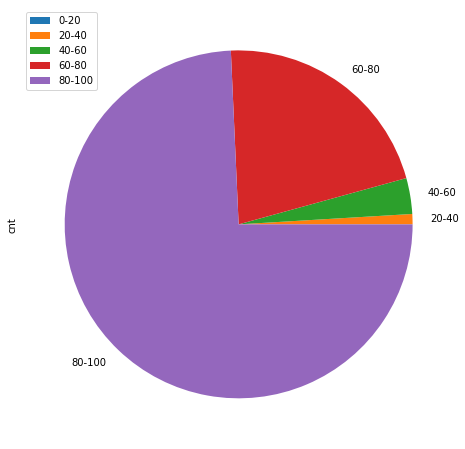

In [5]:
df[ 'cats' ] = pd.cut( df['perc'], bins=[0,20,40,60,80,100], labels=["0-20","20-40","40-60","60-80","80-100"])

pie = pd.DataFrame( { "cnt" : [
    len( df[ (df[ "cats" ] == "0-20") & (df[ "att" ] == "present") ] ),
    len( df[ (df[ "cats" ] == "20-40") & (df[ "att" ] == "present") ] ),
    len( df[ (df[ "cats" ] == "40-60") & (df[ "att" ] == "present") ] ),
    len( df[ (df[ "cats" ] == "60-80") & (df[ "att" ] == "present") ] ),
    len( df[ (df[ "cats" ] == "80-100") & (df[ "att" ] == "present") ] )
]}, index=[ "0-20", "20-40", "40-60", "60-80", "80-100" ] )
pie[ "cnt" ] = pie[ "cnt" ].astype( "int" )


pie.plot.pie(y="cnt",figsize=(8,8))

print(df[ df[ "att" ] == "present" ][ "perc" ].mean())

In [6]:
print(df[ (df[ "att" ] == "present") & (df[ "perc" ] >  99.5) ].sort_values( by = "perc", ascending=False ).to_latex())

\begin{tabular}{llllrll}
\toprule
{} &               name &      att & count &        perc &         ratio &    cats \\
\midrule
46  &  František Navrkal &  present &   239 &  100.000000 &     195/11/33 &  80-100 \\
144 &       Jiří Hlavatý &  present &    16 &  100.000000 &        12/3/1 &  80-100 \\
236 &        Martin Půta &  present &    16 &  100.000000 &        13/2/1 &  80-100 \\
334 &     Radek Rozvoral &  present &  3716 &   99.731616 &  2846/300/570 &  80-100 \\
204 &       Lukáš Bartoň &  present &  3709 &   99.543747 &  2827/414/468 &  80-100 \\
262 &    Miloslav Rozner &  present &  3709 &   99.543747 &  2787/298/624 &  80-100 \\
\bottomrule
\end{tabular}



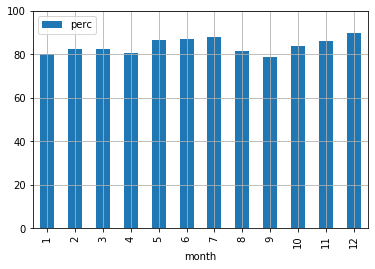

In [7]:
pres = data[ (data[ 'vote' ] == "A") | (data[ 'vote' ] == "N") | (data[ 'vote' ] == "Z") ][ "month" ].value_counts().to_dict()
abse = data[ (data[ 'vote' ] == "M") | (data[ 'vote' ] == "0") ][ "month" ].value_counts().to_dict()

perc = []
for i in range(1,13):
    perc.append( (i, pres[ i ] / (pres[ i ] + abse[ i ]) * 100, pres[ i ]) )
    
df = pd.DataFrame(data=perc,columns=["month","perc", "cnt"])
df.plot.bar( x = "month", y = "perc", grid=True, ylim=(0,100) )